In [1]:
# 8. Семейное положение и доход
# Гипотеза: существует связь между семейным положением и уровнем дохода.
# Дополнительный анализ:
# 	- Проверить другие переменные: живёт ли респондент с партнёром (вне брака), наличие детей и количество детей.


In [2]:
from dataframes import dataframes # словарь датафреймов, ключи: 2010, 2012, 2014, 2016, 2018, 2021, 2022.
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [3]:
dataframes_list = [dataframes['2010'], dataframes['2012'], dataframes['2014'], dataframes['2016'], dataframes['2018'], dataframes['2021'], dataframes['2022']]

Используемы в исследовании переменные:
- realrinc - реальный доход
- marital - семейное положение
- childs - наличие и количество детей

Значения marital, которые значат, что респондент:
- 1 - женат
- 2 - вдовец
- 3 - разведён
- 4 - женат, но живёт с партнёром раздельно
- 5 - никогда не был женат

Значения childs, которые значат, что респондент:
- 0 - нет детей
- 1-7 - количество детей

# Создаём датафрейм

In [8]:
cols = ['realrinc','marital','childs']
df = pd.concat(
    [frame[frame.columns.intersection(cols)].copy() for frame in dataframes_list],
    ignore_index=True
)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19952 entries, 0 to 19951
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   marital   19919 non-null  float64
 1   childs    19864 non-null  float64
 2   realrinc  11667 non-null  float64
dtypes: float64(3)
memory usage: 467.8 KB


In [9]:
df.head()

,marital,childs,realrinc
0,5.0,0.0,42735.0
1,5.0,0.0,3885.0
2,3.0,3.0,NaN
3,2.0,5.0,NaN
4,1.0,8.0,NaN


# Сразу удаляем лишние данные

In [11]:
df = df[df.realrinc.notna() & df.marital.notna() & df.childs.notna()]
df.shape

(11645, 3)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11645 entries, 0 to 19951
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   marital   11645 non-null  float64
 1   childs    11645 non-null  float64
 2   realrinc  11645 non-null  float64
dtypes: float64(3)
memory usage: 363.9 KB


# Проверяем данные

Гистограмма для дохода:

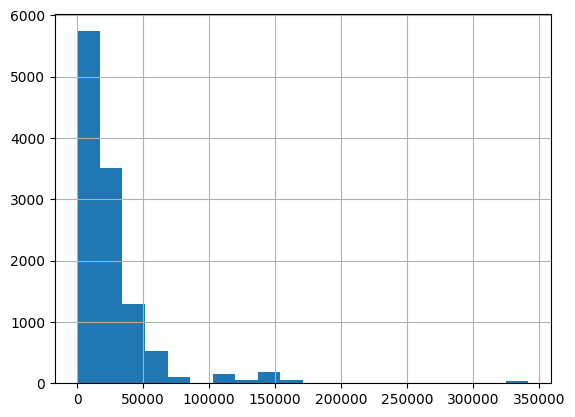

In [16]:
df.realrinc.hist(bins=20);

Количество людей в группах для marital и гистограмма:

In [18]:
df.groupby('marital').count()

,childs,realrinc
marital,,
1.0,5477,5477
2.0,377,377
3.0,1940,1940
4.0,354,354
5.0,3497,3497


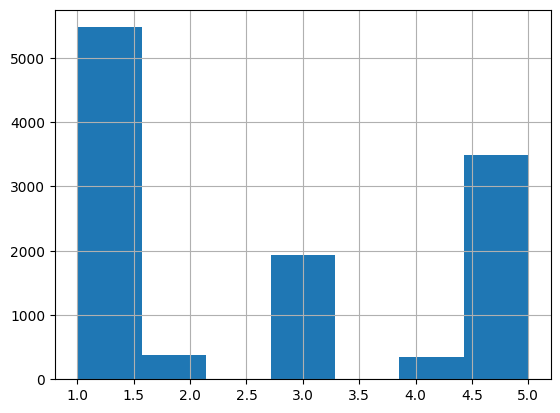

In [19]:
df.marital.hist(bins=7);

Количество людей в группах для childs и гистограмма:

In [21]:
df.groupby('childs').count()

,marital,realrinc
childs,,
0.0,3688,3688
1.0,1977,1977
2.0,3115,3115
3.0,1674,1674
4.0,712,712
5.0,242,242
6.0,131,131
7.0,43,43
8.0,63,63


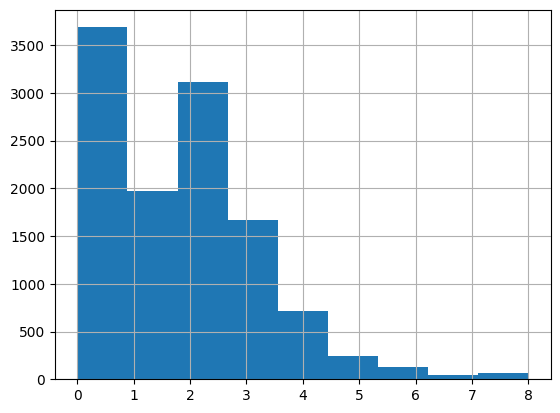

In [22]:
df.childs.hist(bins=9);

# Проводим анализ

## Анализ дохода от семейного положения

Зависимость уровня дохода от семейного положения:

In [26]:
vals = df.groupby('marital').realrinc.mean().reset_index()
vals

,marital,realrinc
0,1.0,32238.220714
1,2.0,20412.103377
2,3.0,24812.255277
3,4.0,19977.738961
4,5.0,16837.408967


Проверяем количество данных для каждого значения

In [28]:
check = df.groupby('marital').realrinc.count()
check

marital
1.0    5477
2.0     377
3.0    1940
4.0     354
5.0    3497
Name: realrinc, dtype: int64

Переименовываем значения

In [43]:
vals.loc[0, 'marital'] = 'Женат'
vals.loc[1, 'marital'] = 'Вдовец'
vals.loc[2, 'marital'] = 'Разведён'
vals.loc[3, 'marital'] = 'Женат, но живёт\n с партнёром раздельно'
vals.loc[4, 'marital'] = 'Не был женат'

C:\Users\DIMAc\AppData\Local\Temp\ipykernel_16316\2632081682.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Женат' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  vals.loc[0, 'marital'] = 'Женат'


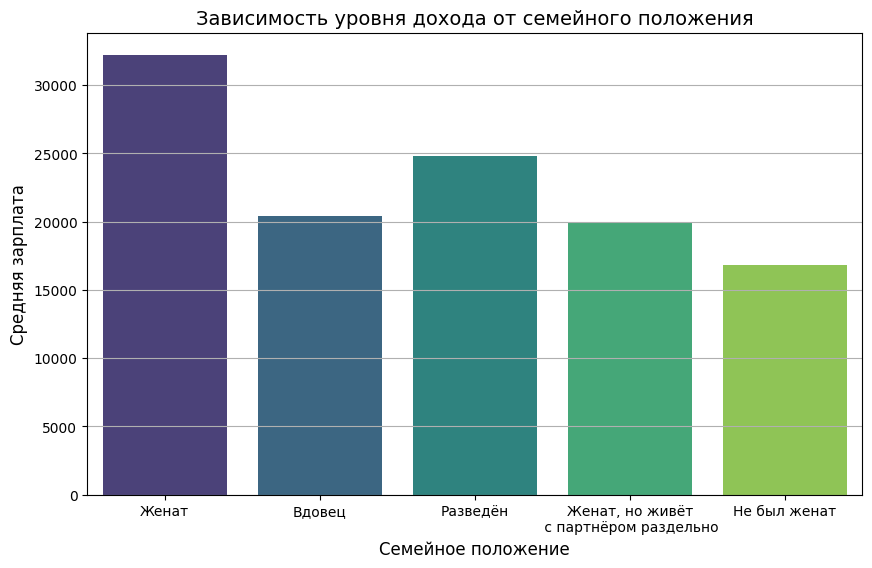

In [45]:
plt.figure(figsize=(10, 6))
sns.barplot(x='marital', y='realrinc', data=vals, hue='marital', palette='viridis')

plt.title('Зависимость уровня дохода от семейного положения', fontsize=14)
plt.xlabel('Семейное положение', fontsize=12)
plt.ylabel('Cредняя зарплата', fontsize=12)
plt.grid(axis='y');

Больший уровень дохода у женатых людей может объясняться тем, что обычно женяться люди с большим достатком или люди, которые помогая друг другу с молодости, в будущем имеют больший профит

Описательная статистика для датафрейма

In [49]:
df.describe()

,marital,childs,realrinc
count,11645.000000,11645.000000,11645.000000
mean,2.657965,1.621125,25620.645067
std,1.740279,1.528286,32277.950313
min,1.000000,0.000000,204.500000
25%,1.000000,0.000000,8512.500000
50%,2.000000,2.000000,17550.000000
75%,5.000000,2.000000,30645.000000
max,5.000000,8.000000,341672.379300


## Анализ дохода от количества детей

Зависимость уровня дохода от количества детей:

In [53]:
vals = df.groupby('childs').realrinc.mean().reset_index()
vals

,childs,realrinc
0,0.0,21872.106688
1,1.0,24976.841964
2,2.0,30801.704305
3,3.0,26640.770701
4,4.0,24397.170827
5,5.0,23424.579542
6,6.0,17123.938079
7,7.0,24536.849418
8,8.0,22651.625866


Проверяем количество данных для каждого значения

In [56]:
check = df.groupby('childs').realrinc.count()
check

childs
0.0    3688
1.0    1977
2.0    3115
3.0    1674
4.0     712
5.0     242
6.0     131
7.0      43
8.0      63
Name: realrinc, dtype: int64

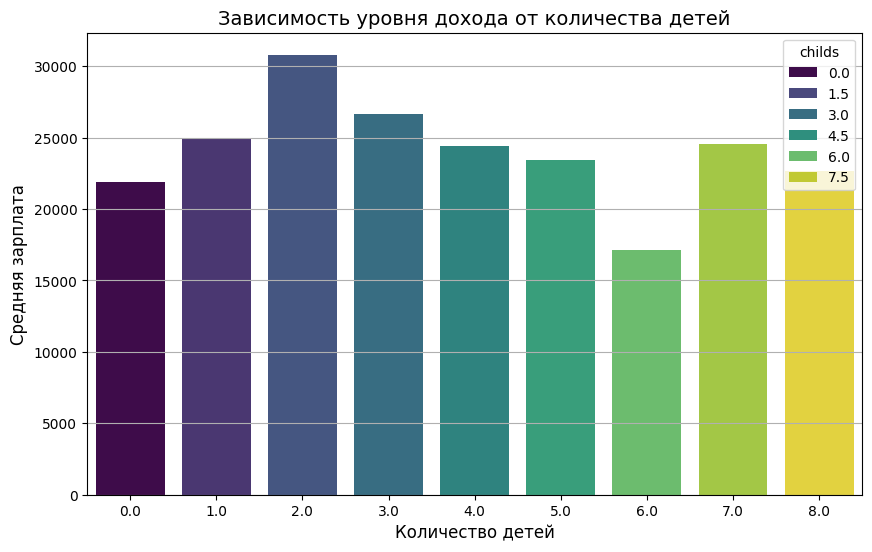

In [58]:
plt.figure(figsize=(10, 6))
sns.barplot(x='childs', y='realrinc', data=vals, hue='childs', palette='viridis')

plt.title('Зависимость уровня дохода от количества детей', fontsize=14)
plt.xlabel('Количество детей', fontsize=12)
plt.ylabel('Cредняя зарплата', fontsize=12)
plt.grid(axis='y');

В целом, никакой зависимости не прослеживается

Проверим наличие связи между переменными. Для этого выведем тепловую карту.

<Axes: >

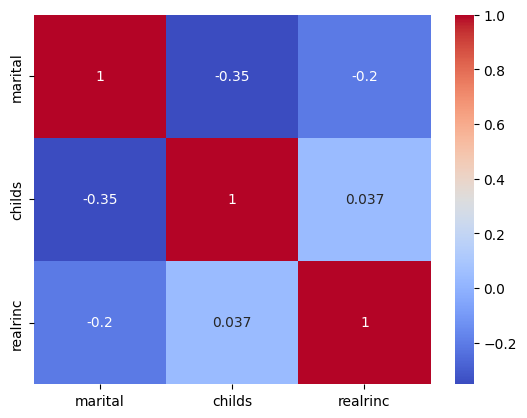

In [62]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

Полученные результаты позволяют говорить о связи между семейным положением и детьми, семейным положением и доходами, доходами и детьми.

Создадим две новых бинарных колонки: есть/нет дети; замужем/холост.

In [66]:
df['have_child'] = (df.childs != 0).astype(int)
df['single'] = ((df.marital != 0) & (df.marital != 3)).astype(int)
df

,marital,childs,realrinc,have_child,single
0,5.0,0.0,42735.00000,0,1
1,5.0,0.0,3885.00000,0,1
5,5.0,2.0,5827.50000,1,1
6,3.0,1.0,42735.00000,1,0
10,5.0,1.0,12302.50000,1,1
...,...,...,...,...,...
19942,1.0,2.0,141848.32887,1,1
19946,1.0,4.0,49080.00000,1,1
19948,1.0,0.0,11247.50000,0,1
19949,1.0,1.0,15337.50000,1,1


Выведем новую тепловую карту для определения связей между новыми переменными.

<Axes: >

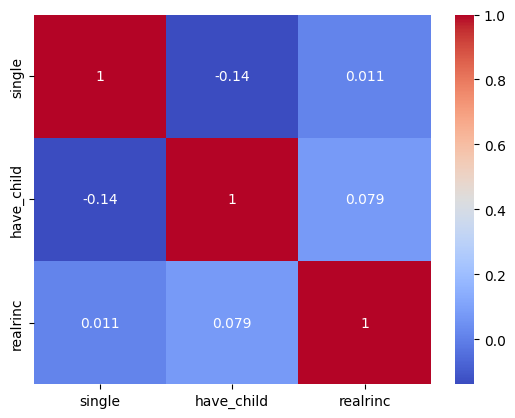

In [69]:
sns.heatmap(df[['single', 'have_child', 'realrinc']].corr(), annot=True, cmap='coolwarm')

Выведем информацию о датафрейме, чтобы проанализировать новосозданные группы.

In [72]:
df.groupby('have_child')['have_child'].value_counts()

have_child
0    3688
1    7957
Name: count, dtype: int64

In [74]:
df.groupby('single')['single'].value_counts()

single
0    1940
1    9705
Name: count, dtype: int64

In [76]:
df.describe()

,marital,childs,realrinc,have_child,single
count,11645.000000,11645.000000,11645.000000,11645.000000,11645.000000
mean,2.657965,1.621125,25620.645067,0.683298,0.833405
std,1.740279,1.528286,32277.950313,0.465210,0.372630
min,1.000000,0.000000,204.500000,0.000000,0.000000
25%,1.000000,0.000000,8512.500000,0.000000,1.000000
50%,2.000000,2.000000,17550.000000,1.000000,1.000000
75%,5.000000,2.000000,30645.000000,1.000000,1.000000
max,5.000000,8.000000,341672.379300,1.000000,1.000000


Из приведенных данных делаем вывод, что у 68% респондентов есть дети, а 83 не связаны узами брака. Выполним тест Краскела-Уоллиса, поскольку распределение данных отлично от нормального, с целью выяснить, значимы ли различия в группах 'single' и 'have_child', или их можно не учитывать при дальнейшем анализе.

In [79]:
from scipy.stats import kruskal

groups = [df[df['single'] == prof]['realrinc'] for prof in df['single'].unique()]

h_stat, p_value = kruskal(*groups)
print('single group')
print(f"Крускал-Уоллис p-value: {p_value:.4f}")

single group
Крускал-Уоллис p-value: 0.0512


p-value для семейного положения больше 0.05, а значит, смысла рассматривать данную переменную нет, она не имеет статистической значимости. Рассмотрим теперь наличие в семье ребенка.

In [82]:
groups = [df[df['have_child'] == prof]['realrinc'] for prof in df['have_child'].unique()]

h_stat, p_value = kruskal(*groups)
print('have_child group')
print(f"Крускал-Уоллис p-value: {p_value:.4f}")

have_child group
Крускал-Уоллис p-value: 0.0000


В данном случае значение p-value равно нулю, а значит, между респондентами, у которых дети есть, и у которых их нет, существуют различия. Переменная статистически значима, при построении дальнейшей модели имеет смысл ее использовать.

Проверим наличие разницы между женатыми, живущими вместе и раздельно.

In [86]:
groups = [df[df.marital == 1]['realrinc'], df[df.marital == 4]['realrinc']]
h_stat, p_value = kruskal(*groups)
print('together\separately group')
print(f"Крускал-Уоллис p-value: {p_value:.4f}")

together\separately group
Крускал-Уоллис p-value: 0.0000


<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
C:\Users\DIMAc\AppData\Local\Temp\ipykernel_16316\423954650.py:3: SyntaxWarning: invalid escape sequence '\s'
  print('together\separately group')


Разница между группами есть, статистически значимая.

Проверим на наличие статистически значимых различий между всеми видами семейного положения.

In [90]:
groups = [df[df['marital'] == prof]['realrinc'] for prof in df['marital'].unique()]

h_stat, p_value = kruskal(*groups)
print('marital group')
print(f"Крускал-Уоллис p-value: {p_value:.4f}")

marital group
Крускал-Уоллис p-value: 0.0000


p-value равно нулю, а значит, разница между всеми видами присутствует.

# Для построения моделей делаем one-hot кодирование и нормализацию

One-hot кодирование для семейного положения

In [95]:
df = pd.get_dummies(df, columns=['marital'], dtype=int)
#df = pd.get_dummies(df, columns=['childs'])

Нормализация дохода

In [98]:
scaler = StandardScaler()

In [100]:
df['scale_realrinc'] = scaler.fit_transform(df[['realrinc']])

In [102]:
df.head()

,childs,realrinc,have_child,single,marital_1.0,marital_2.0,marital_3.0,marital_4.0,marital_5.0,scale_realrinc
0,0.0,42735.0,0,1,0,0,0,0,1,0.530241
1,0.0,3885.0,0,1,0,0,0,0,1,-0.673419
5,2.0,5827.5,1,1,0,0,0,0,1,-0.613236
6,1.0,42735.0,1,0,0,0,1,0,0,0.530241
10,1.0,12302.5,1,1,0,0,0,0,1,-0.412626


Построим 4 модели: 
1. доход ~ семейное положение
2. доход ~ наличие детей в семье
3. доход ~ семейное положение + наличие детей в семье
4. доход ~ семейное положение + количество детей в семье

In [105]:
import statsmodels.api as sm

X = df.drop(['realrinc', 'scale_realrinc', 'childs', 'have_child', 'single'], axis=1)
y = df['realrinc']

# Добавляем константу (intercept)
X = sm.add_constant(X)

# Строим модель
model1 = sm.OLS(y, X).fit()

# Выводим результаты
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:               realrinc   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     106.7
Date:                Sat, 24 May 2025   Prob (F-statistic):          1.51e-110
Time:                        18:03:53   Log-Likelihood:            -1.3716e+05
No. Observations:               11645   AIC:                         2.743e+05
Df Residuals:                   11639   BIC:                         2.744e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.115e+16   1.61e+16      0.692      

В результате мы получаем никакую модель: низкий R-squared и ни одной значимой переменной. Данных недостаточно для обучения конечной модели и предсказания доходов на основе данных о семейном положении респондента.

In [108]:
X = df['have_child']
y = df['realrinc']

# Добавляем константу (intercept)
X = sm.add_constant(X)

# Строим модель
model2 = sm.OLS(y, X).fit()

# Выводим результаты
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:               realrinc   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     73.25
Date:                Sat, 24 May 2025   Prob (F-statistic):           1.29e-17
Time:                        18:03:53   Log-Likelihood:            -1.3739e+05
No. Observations:               11645   AIC:                         2.748e+05
Df Residuals:                   11643   BIC:                         2.748e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.187e+04    529.868     41.278      0.0

Модель, предсказывающая доход на основании наличия в семье ребенка, лучше предыдущей, поскольку коэффициенты у нее значимые. Но низкий R-squared не позволяет использовать данную модель для решения задач.

In [111]:
X = df.drop(['realrinc', 'scale_realrinc', 'childs', 'single'], axis=1)
y = df['realrinc']

# Добавляем константу (intercept)
X = sm.add_constant(X)

# Строим модель
model3 = sm.OLS(y, X).fit()

# Выводим результаты
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:               realrinc   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     89.31
Date:                Sat, 24 May 2025   Prob (F-statistic):          5.74e-110
Time:                        18:03:55   Log-Likelihood:            -1.3716e+05
No. Observations:               11645   AIC:                         2.743e+05
Df Residuals:                   11638   BIC:                         2.744e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3.581e+15   2.68e+16      0.134      

Третья модель - это сочетание первых двух. Ни одной статистически значимой переменной и крайне низкий R-squared делает данную модель непригодной для использования.

In [114]:
X = df.drop(['realrinc', 'scale_realrinc', 'have_child', 'single'], axis=1)
y = df['realrinc']

# Добавляем константу (intercept)
X = sm.add_constant(X)

# Строим модель
model4 = sm.OLS(y, X).fit()

# Выводим результаты
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:               realrinc   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     109.9
Date:                Sat, 24 May 2025   Prob (F-statistic):          9.01e-114
Time:                        18:03:57   Log-Likelihood:            -1.3715e+05
No. Observations:               11645   AIC:                         2.743e+05
Df Residuals:                   11639   BIC:                         2.744e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.264e+15    4.2e+16      0.054      

Последняя модель, которая ориентируется на число детей в семье и семейное положение респондента, не сильно выделяется на фоне остальных. Единственный статистически значимый коэффициент - число детей. Но константа остается незначимой, от чего полезность модель не приобретает. Каждая из 4 моделей имеет крайне низкий p-value для F-статистики, что говорит о значимости моделей как таковых, но сильная ограниченность не позволяет их должным образом использовать.

Для наглядности, попробуем визуализировать одну из моделей, чтобы подтвердить наши выводы об их непригодности.

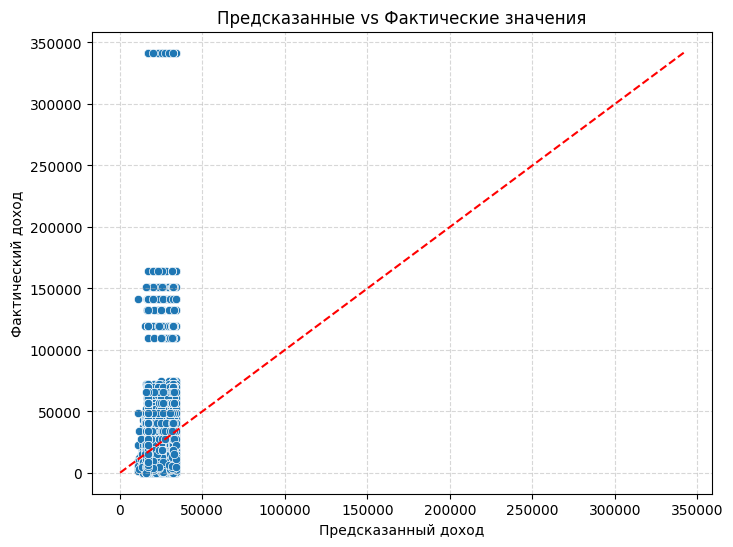

In [118]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=model4.fittedvalues, y=y)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Линия идеального предсказания
plt.title('Предсказанные vs Фактические значения')
plt.xlabel('Предсказанный доход')
plt.ylabel('Фактический доход')
plt.grid(linestyle='--', alpha=0.5)
plt.show()

# Выводы

1. В ходе выполнения данного исследования выяснилось, что в среднем у людей в браке больший доход, чем у людей вне брака, что подверждает нашу гипотезу.
2. Связи между числом детей в семье и доходом не выявлено.
3. Наличие же ребенка свидетельствует о чуть больших доходах семьи, если сравнивать с такой же семьей без детей.
4. Модели регрессии, ограниченные данными о наличии/количестве детей в семье и о семейном положении, непригодны для выполнения анализа, пусть они и статистически значимы. Их необходимо расширять.

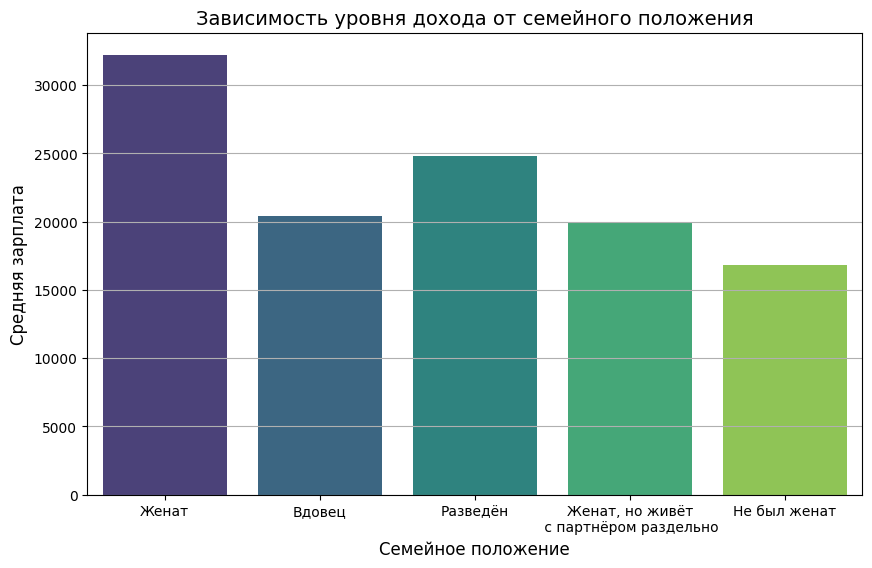

In [47]:
plt.figure(figsize=(10, 6))
sns.barplot(x='marital', y='realrinc', data=vals, hue='marital', palette='viridis')

plt.title('Зависимость уровня дохода от семейного положения', fontsize=14)
plt.xlabel('Семейное положение', fontsize=12)
plt.ylabel('Cредняя зарплата', fontsize=12)
plt.grid(axis='y');

In [93]:
groups = [df[df['have_child'] == prof]['realrinc'] for prof in df['have_child'].unique()]

h_stat, p_value = kruskal(*groups)
print('have_child group')
print(f"Крускал-Уоллис p-value: {p_value:.4f}")

have_child group
Крускал-Уоллис p-value: 0.0000


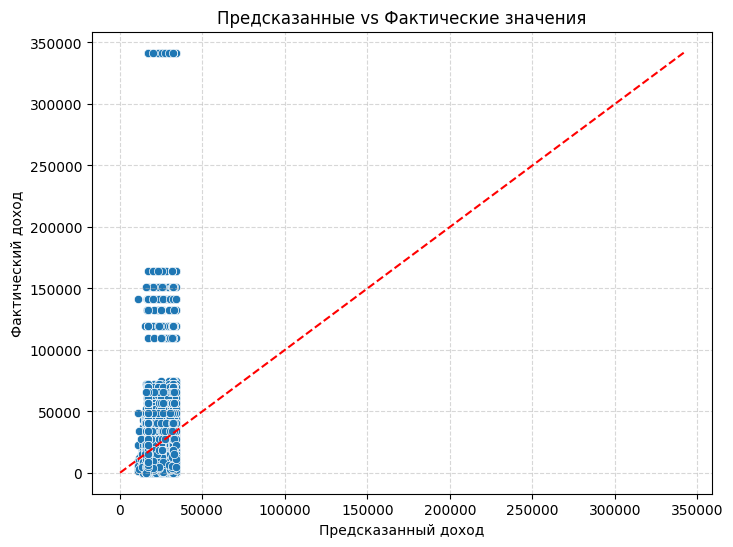

In [120]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=model4.fittedvalues, y=y)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Линия идеального предсказания
plt.title('Предсказанные vs Фактические значения')
plt.xlabel('Предсказанный доход')
plt.ylabel('Фактический доход')
plt.grid(linestyle='--', alpha=0.5)
plt.show()